In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf #tensorflow - machine learning framework for building and training deep learning models

from tensorflow import keras  #keras - high-level API running on top of TensorFlow that simplifies the creation of neural networks.
from tensorflow.keras import layers


In [2]:
#py -3.11 -m pip install tensorflow


In [3]:
data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'
data_train_test = 'Fruits_Vegetables/Fruits_Vegetables/test'
data_train_val = 'Fruits_Vegetables/Fruits_Vegetables/validation'

In [4]:
img_width = 180
img_height = 180

Preprocessing of Data

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size= 32, 
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [33]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'brinjal',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_train_val,
    shuffle = False,
    image_size=(img_width, img_height),
    batch_size= 32, 
    validation_split = False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_train_test,
    shuffle = False,
    image_size=(img_width, img_height),
    batch_size= 32, 
    validation_split = False)

Found 359 files belonging to 36 classes.


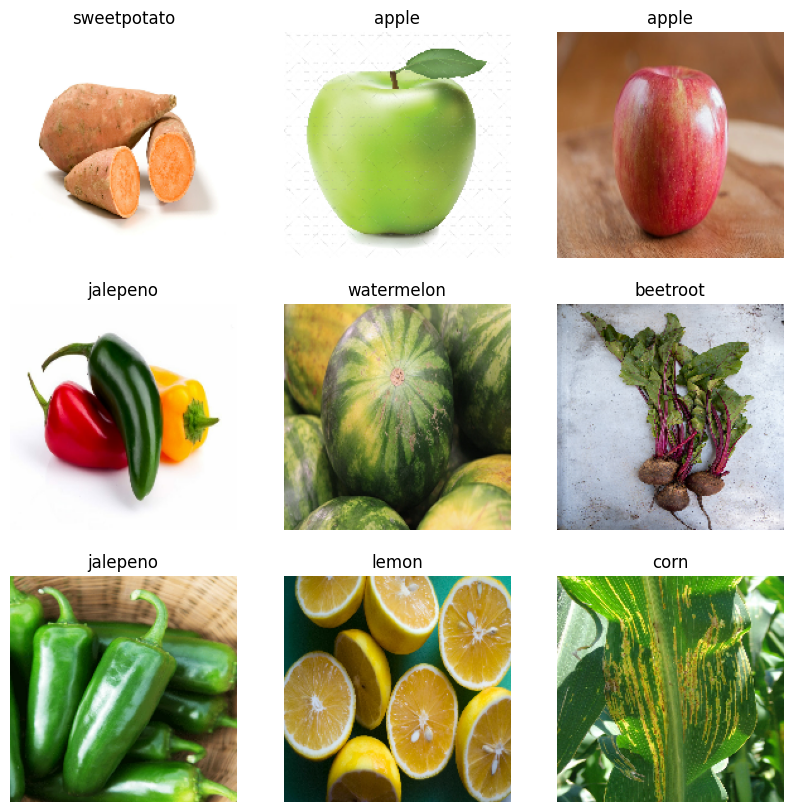

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

Model Creation

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [13]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_val, epochs= epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 504ms/step - accuracy: 0.0588 - loss: 3.7899 - val_accuracy: 0.2650 - val_loss: 2.4970
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 454ms/step - accuracy: 0.2587 - loss: 2.5981 - val_accuracy: 0.4843 - val_loss: 1.8142
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 467ms/step - accuracy: 0.3828 - loss: 2.1372 - val_accuracy: 0.6524 - val_loss: 1.3314
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 445ms/step - accuracy: 0.4905 - loss: 1.7680 - val_accuracy: 0.7493 - val_loss: 0.9975
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 445ms/step - accuracy: 0.6121 - loss: 1.3368 - val_accuracy: 0.8405 - val_loss: 0.6294
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 441ms/step - accuracy: 0.7570 - loss: 0.9044 - val_accuracy: 0.8889 - val_loss: 0.4862
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 441ms/step - accuracy: 0.8185 - loss: 0.6385 - val_accuracy: 0.9430 - val_loss: 0.3642
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 431ms/step - accuracy: 0.8925 - loss: 0.4035 - val_accu

Text(0.5, 1.0, 'Loss')

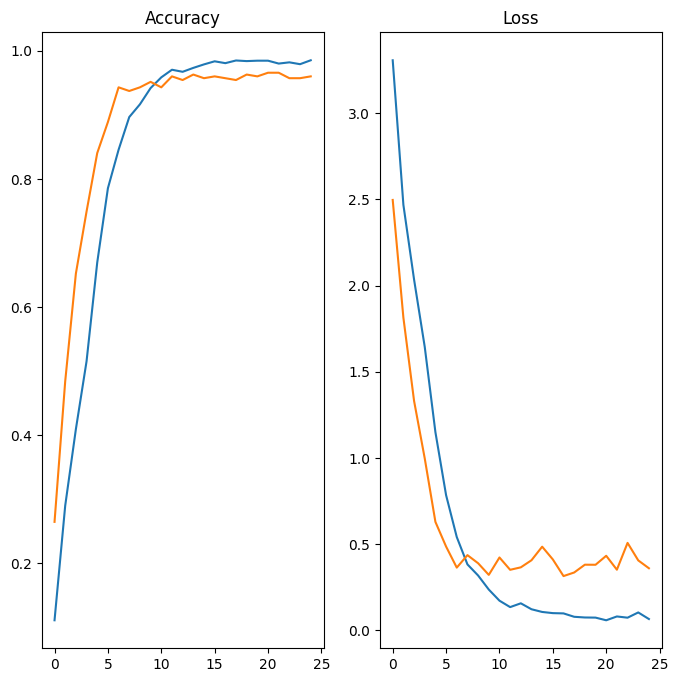

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [29]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)


In [30]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [31]:
score = tf.nn.softmax(predict)

In [32]:
print('vegetable/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

vegetable/Fruit in image is apple with accuracy of 99.84


In [20]:
model.save('Image_Classify.keras')